# Starting of the tracking clouds

Define clouds, basic tools


### Nov 2020, JAH

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

to_df = pd.DataFrame.from_records

In [32]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.hfit         as hfit

import bes.bes           as bes
import bes.clouds        as clouds
import bes.chits         as chits
import bes.display       as nplay
import bes.pltclouds     as pltclouds

In [33]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Sat Dec  5 12:55:23 2020


### load data

In [34]:
def get_chits_filename(run_number, label = 'ds_rough'):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/chits_{label}_{run_number}.h5'
    return filename


In [35]:
fname = get_chits_filename(8182)
print(fname)
ddh    = pd.read_hdf(fname, 'CHITs.lowTh')
dde    = ddh.groupby('event')
events = np.unique(ddh.event.values)
print('total events ', len(events))

/home/hernando/data/NEW/chits_ds_rough_8182.h5
total events  2760


In [36]:
ddh

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,311,1.602604e+09,0,71.804477,-4.516273,1,75.0,-5.0,0.0,0.0,232.378713,11.466354,207.362455,-1.0,0.000804,-1,-1.0
1,311,1.602604e+09,0,71.804477,-4.516273,1,65.0,-5.0,0.0,0.0,232.378713,9.508168,171.949779,-1.0,0.000658,-1,-1.0
2,311,1.602604e+09,0,71.804477,-4.516273,1,85.0,5.0,0.0,0.0,232.378713,7.788881,140.857459,-1.0,0.000552,-1,-1.0
3,311,1.602604e+09,0,71.804477,-4.516273,1,85.0,-5.0,0.0,0.0,232.378713,7.362239,133.141875,-1.0,0.000522,-1,-1.0
4,311,1.602604e+09,0,71.804477,-4.516273,1,65.0,5.0,0.0,0.0,232.378713,6.791595,122.822099,-1.0,0.000471,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061354,2621895,1.602688e+09,0,76.488142,18.951034,1,105.0,35.0,0.0,0.0,255.008522,8.347710,155.514324,-1.0,0.000647,-1,-1.0
2061355,2621895,1.602688e+09,0,76.488142,18.951034,1,105.0,5.0,0.0,0.0,255.008522,7.884620,146.887162,-1.0,0.000599,-1,-1.0
2061356,2621895,1.602688e+09,0,76.488142,18.951034,1,115.0,5.0,0.0,0.0,255.008522,7.209332,134.306835,-1.0,0.000555,-1,-1.0
2061357,2621895,1.602688e+09,0,76.488142,18.951034,1,95.0,5.0,0.0,0.0,255.008522,6.578020,122.545751,-1.0,0.000486,-1,-1.0


In [61]:
def draw_event(event = None):
    event = np.random.choice(events, 1)[0] if event is None else event
    print('event ', event)
    hh    = dde.get_group(event)
    x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
    #x, y, z, eraw = hits(hh, 'E')
    
    nplay.event(x, y, z, erec, alpha = 0.2, cmap = 'jet');
    #nplay.wf(x, y, z, erec, cmap = 'jet');
    #nplay.wf(x, y, z, eraw, cmap = 'jet');
    #nplay.wfcalib(x, y, z, erec, eraw, cmap = 'jet')
    

## Load Event

event  1477362


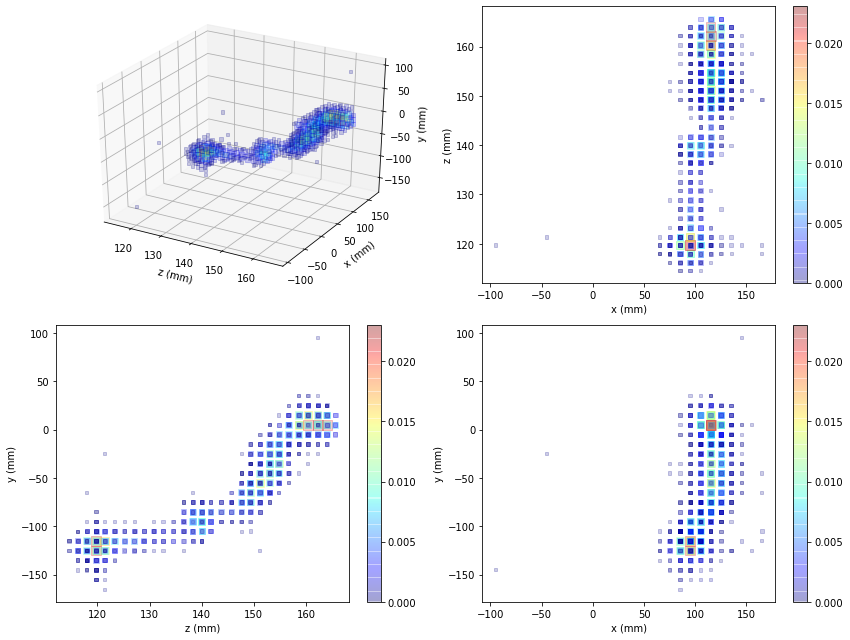

In [152]:
xevents = [1241463, 981141, 2300475, 543247]
#xevents = [1002903, 928609, 1057115, 226373]
#xevents = 1883117, 1368698 # one-electron
#xevents = 2617619 # multiple-connections!
xevents = np.unique(ddh.event.values)
event   = np.random.choice(xevents, 1)[0]
#event   = 1645993, 1807203, 756596, 39402 # A nice track
draw_event(event)

## Load the event

In [153]:
#event = 543247
hh    = dde.get_group(event)
x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
xstep, ystep, zstep = 10., 10., 2.

## Run clouds

In [154]:
ndim    = 3
coors   = (x, y, z)
steps   = (xstep, ystep, zstep)
weights = erec

dfclouds = clouds.clouds(coors, steps, weights)
#dfclouds

 clouds size  3 592


## Draw clouds

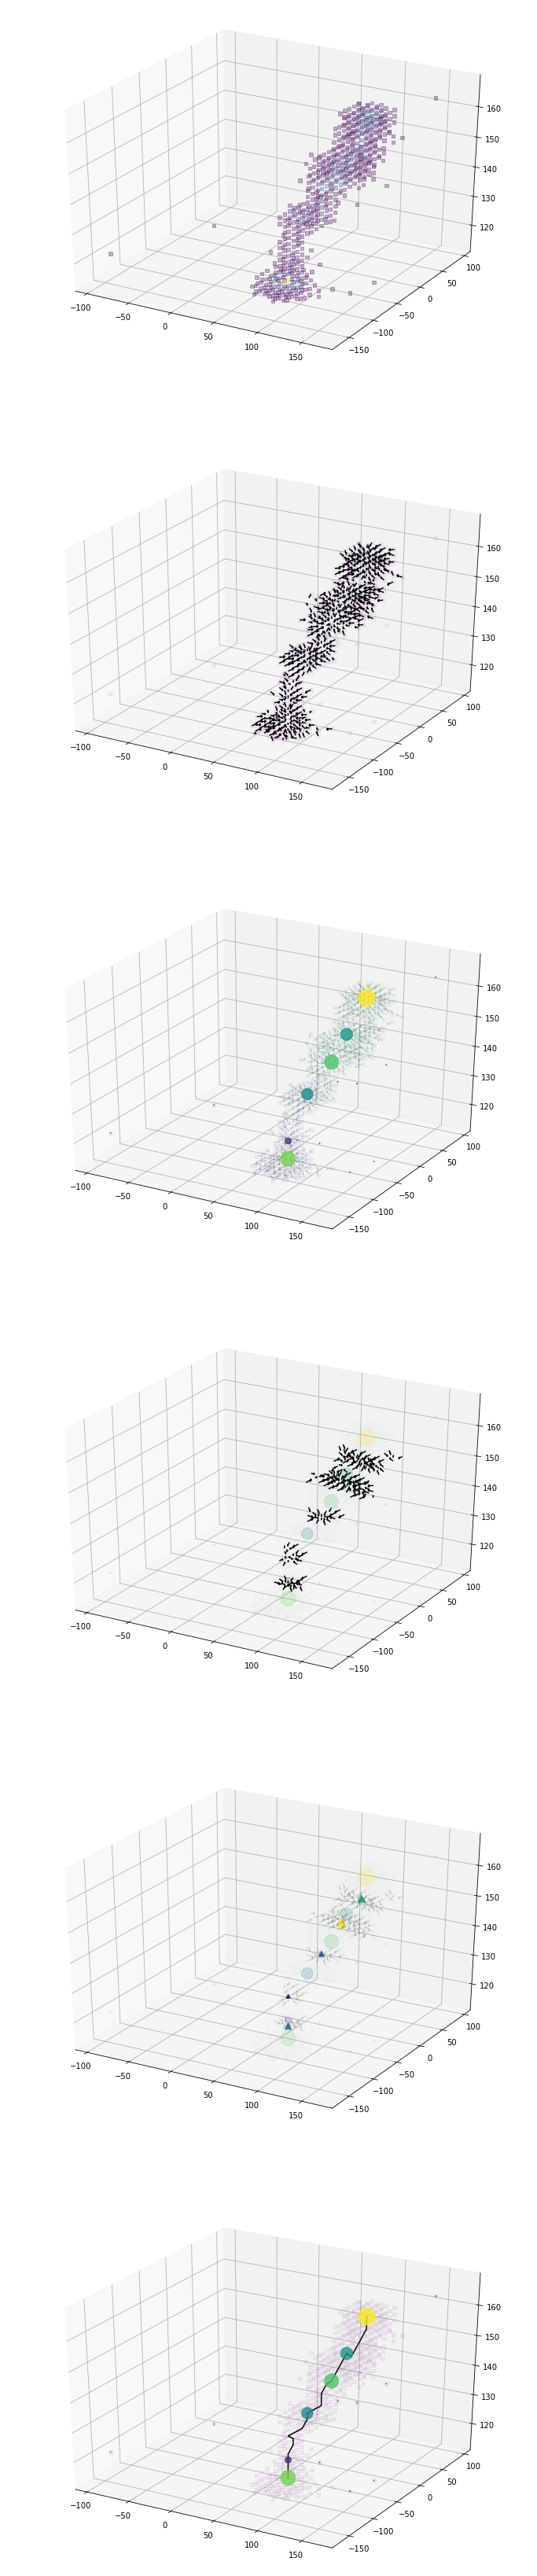

In [156]:
pltclouds.dcloud_steps(dfclouds, ndim, xaxis = 0)

## Clouds code

In [10]:
def run_clouds_ref(coors, steps, weights):
    
    potential, bins           = clouds.potential(coors, steps, weights)
    cells, cells_ene          = clouds.voxels(potential, bins)
    ndim, nsize               = len(cells), len(cells[0])
    icells                    = clouds.to_indices(cells, bins)
    cells_hid                 = clouds.to_ids(icells)
    cells_kid                 = np.arange(nsize)
    _, cells_neighbours       = clouds.neighbours(potential, bins)
    _, cells_egrad, cells_dirs = clouds.gradient(potential, bins)
    cells_node, cells_epath, _ = clouds.paths(cells, bins, steps, cells_dirs)
    cells_enode               = clouds.energy_nodes(cells_ene, cells_node) 
    
    vgrad, vnode, vkid = clouds.staples(bins, cells, cells_ene, cells_kid , cells_kid) # equivalent to gradient!
    lgrad, lnode, lkid = clouds.staples(bins, cells, cells_ene, cells_node, cells_kid)
    cells_lnode = lnode
    cells_lgrad = lgrad
    cells_lpath = lkid
    
    uzeros = np.zeros(nsize)
    
    dat = {}
    for i in range(ndim):
        dat['x'+str(i)] = cells[i]            # positions of the cells
    dat['ene']          = cells_ene           # energy of the cells
    dat['kid']          = cells_kid           # local-ID of the cells
    dat['egrad']        = cells_egrad          # energy grandient of the cell
    dat['epath']        = cells_epath         # local-ID cell that has the largest energy gradient to this cell
    dat['neighbours']   = cells_neighbours    # number of neighbours cells
    dat['enode']        = cells_enode         # energy of the node (sum of the energies) only for node-cells
    dat['node']      = cells_node          # local-ID of the node-cell of this cell
    dat['lgrad']        = cells_lgrad         # energy gradient with cells of different nodes
    dat['lpath']        = cells_lpath         # local-ID of the cells with the largest energy gradient and different node
    dat['elink']        = uzeros              # energy of the link between two cells of different nodes
    dat['ilink']        = uzeros              # indeces of the links, sorted by energy (decreasing)

    return pd.DataFrame(dat)

In [11]:
arstep      = clouds.arstep
to_coors    = clouds.to_coors
get_moves   = clouds.get_moves
get_path    = clouds.get_path
get_segment = clouds.get_segment

def sorted_by_energy(kids, enes):
    sel = enes > 0.
    nodes = sorted(zip(enes[sel], kids[sel]))
    nodes.reverse()
    xenes, xkids = [node[0] for node in nodes], [node[1] for node in nodes]
    return xkids, xenes

def get_pass_path(kid, epath, lpath):
    path1 = get_path(kid             , epath)
    path2 = get_path(lpath[kid], epath)
    path1.reverse()
    path = path1 + path2
    return path

def get_segment(cells, kids):
    """ Fron a list of local IDs returns a segment to plot
    inputs:
        cells: tuple(array), m-dim tuple with n-size array with the cells' cordinates positions
        kids: tuple(int), list of the ID to generate the segment
    """
    ndim = len(cells)
    segment = [np.array([float(cells[i][kid]) for kid in kids]) for i in range(ndim)]
    return segment


In [12]:
def clouds_size(coors, weights = None):

    ndim  = len(coors)
    nsize = len(coors[0])

    assert len(steps)   == ndim
    for i in range(ndim): assert len(coors[i]) == nsize
        
    if (weights is not None):
        assert len(weights) == nsize
    
    return ndim, nsize


def clouds_potential(coors, steps, weights):
    
    ndim, _      = clouds_size(coors, weights)
    bins         = [arstep(x, step, True) for x, step in zip(coors, steps)]
    potential, _ = np.histogramdd(coors, bins, weights = weights)
    
    sel          = potential > 0
    icells       = to_coors(np.argwhere(sel))
    enes         = potential[icells]
    nsize        = len(enes)
    kids         = np.arange(nsize)
    
    centers      = [ut.centers(ibin) for ibin in bins]
    cells        = [centers[i][icells[i]] for i in range(ndim)]
        
    return bins, cells, enes, kids.astype(int)
    

def clouds_neighbours(bins, cells, cells_ene):
    
    steps        = [ibin[1] - ibin[0] for ibin in bins]

    ndim, _      = len(cells), len(cells[0])

    counts, _       = np.histogramdd(cells, bins, weights = cells_ene)
    
    sel = counts > 0
    counts[sel]   = 1      

    moves = get_moves(ndim)
    for move in moves:
        coors_next         = [cells[i] + steps[i] * move[i] for i in range(ndim)]
        potential_next, _  = np.histogramdd(coors_next, bins, weights = cells_ene)
        isel                = potential_next > 0
        counts[sel & isel] += 1

    nbours = counts[sel].astype(int)
        
    return nbours


def clouds_gradient(bins, cells, cells_enes, cells_kids):
    """ returns the maximum gradient of energy and the cell which this gradient points to for each cell
    inputs:
        bins : tupe(array), m-dim tuple with the bins in each coordinate
        cells: tuple(array), m-dim tuple with n-size arrays with the cells coordinates
        enes : array,        n-size array with the energy of the cells
        cells_kid  :
    returns:
        cells_grad : array, n-size with the gradient to the link with respect to this cell
        cells_kid  : array, n-size with the id of the gradient cell to this cell
        cells_node : array, n-size with the id of the linked node to this cell
    """

    ndim, nsize  = clouds_size(cells, cells_enes)
    steps        = [ibin[1] - ibin[0] for ibin in bins]

    potential, _ = np.histogramdd(cells, bins, weights = cells_enes)
    kids, _      = np.histogramdd(cells, bins, weights = cells_kids)

    shape        = potential.shape
    sel_cells    = potential > 0

    nn_potential = np.copy(potential)
    nn_kids      = np.copy(kids) .astype(int)

    #moves = get_moves_updown(ndim)
    moves = get_moves(ndim)
    for move in moves:

        coors_next         = [cells[i] + steps[i] * move[i] for i in range(ndim)]
        potential_next, _  = np.histogramdd(coors_next, bins, weights = cells_enes)
        kids_next, _       = np.histogramdd(coors_next, bins, weights = cells_kids)

        sel_pot            = potential_next > nn_potential

        sel                = (sel_cells) & (sel_pot)
        if (np.sum(sel) > 0):
            nn_potential[sel]  = potential_next[sel]
            nn_kids     [sel]  = kids_next     [sel]

    vgrad  = nn_potential[sel_cells] - potential[sel_cells]
    vkids  = nn_kids     [sel_cells].astype(int)

    return vgrad, vkids


def clouds_nodes(cells_ene, cells_kid, cells_epath):
    
    nsize = len(cells_ene)

    # associate each cell to a node
    cells_node  = [get_path(kid, cells_epath)[-1] for kid in cells_kid]
    cells_node  = np.array(cells_node).astype(int)

    # compute the energy of a node and assoticate to the cell enode
    cells_enode    = np.zeros(nsize)
    cells_nodesize = np.zeros(nsize).astype(int)
    nodes = np.unique(cells_node)
    for node in nodes:
        sel   = cells_node == node
        ene   = np.sum(cells_ene[sel])
        size  = np.sum(sel) 
        cells_enode[node]    = ene 
        cells_nodesize[node] = size
        
    return cells_node, cells_enode, cells_nodesize
    
    
def clouds_gradient_link(bins, cells, cells_enes, cells_nodes, cells_kids):
    
    ndim, nsize  = len(cells), len(cells[0])

    steps        = [ibin[1] - ibin[0] for ibin in bins]

    nodes, _     = np.histogramdd(cells, bins, weights = cells_nodes)
    potential, _ = np.histogramdd(cells, bins, weights = cells_enes)
    kids, _      = np.histogramdd(cells, bins, weights = cells_kids)

    shape        = potential.shape
    sel_cells    = potential > 0 

    nn_potential = np.copy(potential)
    nn_nodes     = np.copy(nodes).astype(int)
    nn_kids      = np.copy(kids) .astype(int)

    #moves = get_moves_updown(ndim)
    moves = get_moves(ndim)

    for move in moves:

        coors_next         = [cells[i] + steps[i] * move[i] for i in range(ndim)]
        potential_next, _  = np.histogramdd(coors_next, bins, weights = cells_enes)
        nodes_next, _      = np.histogramdd(coors_next, bins, weights = cells_nodes)
        kids_next, _       = np.histogramdd(coors_next, bins, weights = cells_kids)

        sel_nodes          = nodes_next != nodes
        sel_pot_next       = potential + potential_next > nn_potential

        sel = (sel_cells) & (sel_nodes) & (sel_pot_next)
        nn_potential[sel] = potential[sel] + potential_next[sel]
        nn_nodes    [sel] = nodes_next    [sel]
        nn_kids     [sel] = kids_next     [sel]

    link_grad  = nn_potential[sel_cells] #- potential[sel_cells]
    link_nodes = nn_nodes    [sel_cells]
    link_kids  = nn_kids     [sel_cells]

    return link_grad, link_nodes, link_kids


def clouds_passes(cells_ene, cells_node, cells_enode, cells_lnode, cells_kid, cells_lgrad, cells_lpath):

    nsize  = len(cells_node)
    cells_epass = np.zeros(nsize)
    cells_ipass = np.full(nsize, -1).astype(int)

    nodes_kid, _ = sorted_by_energy(cells_node, cells_enode)
    #print('nodes ', nodes_kid)
    
    sel_passes = (cells_kid == cells_lpath[cells_lpath[cells_kid]])
    #print('possible passes ', np.sum(sel_passes))
    
    for i, inode in enumerate(nodes_kid):
        for jnode in nodes_kid[ i +1 :]:
            sel  = np.logical_and(((cells_node == inode) & (cells_lnode == jnode)), sel_passes)
            #print(' passes? ', inode, jnode, np.sum(sel))
            if (np.sum(sel) > 0) :
                isel = np.argmax(cells_lgrad[sel])
                id1  = cells_kid [sel][isel]
                #print('index 1 ', id1)
                cells_epass[id1] = cells_ene[id1] + cells_ene[cells_lpath[id1]]

    ## here!!!
    #sel     = cells_epass > 0.
    #npasses = np.sum(cells_epass > 0.)

    return cells_epass, cells_ipass
    

In [13]:
#---- NEW 
def run_clouds(coors, steps, weights):
            
    bins, cells, cells_ene, \
    cells_kid                   = clouds_potential(coors, steps, weights)
    ndim, nsize                 = clouds_size(cells, cells_ene)
    print(' clouds size ', ndim, nsize)
    cells_neighbours            = clouds_neighbours(bins, cells, cells_ene)
    cells_egrad, cells_epath    = clouds_gradient (bins, cells, cells_ene, cells_kid)
    cells_node, cells_enode, \
    cells_nodesize              = clouds_nodes(cells_ene, cells_kid, cells_epath)
    
    cells_lgrad, cells_lnode, \
    cells_lpath                 = clouds_gradient_link(bins, cells, cells_ene, cells_node, cells_kid)
    
    cells_epass, cells_ipass    = clouds_passes(cells_ene, cells_node, cells_enode, cells_lnode, 
                                                cells_kid, cells_lgrad, cells_lpath)


    #potential, _             = clouds.potential(coors, steps, weights)
    #cells, cells_ene            = clouds.voxels(potential, bins)
    #_, _ , cells_dirs        = clouds.gradient(potential, bins)
    #cells_node, cells_epath, _  = clouds.paths(cells, bins, steps, cells_dirs)
    #cells_enode                 = clouds.energy_nodes(cells_ene, cells_node) 
    
    #vgrad, vnode, vpath = clouds.staples(bins, cells, cells_ene, cells_kid , cells_kid) # equivalent to gradient!
    #lgrad, lnode, lpath = clouds.staples(bins, cells, cells_ene, cells_node, cells_kid)
    #cells_lnode = lnode
    #cells_lgrad = lgrad
    #cells_lpath = lpath

    #staples, cells_staples = clouds.set_staples(cells_node, cells_inode, cells_kid, cells_lpath, cells_lgrad)
    
    uzeros = np.zeros(nsize)
    
    dat = {}
    for i in range(ndim):
        dat['x'+str(i)] = cells[i]            # positions of the cells
    dat['ene']          = cells_ene           # energy of the cells
    dat['kid']          = cells_kid           # local-ID of the cells
    dat['egrad']        = cells_egrad         # energy grandient of the cell
    dat['epath']        = cells_epath         # local-ID cell that has the largest energy gradient to this cell
    dat['neighbours']   = cells_neighbours    # number of neighbours cells
    dat['enode']        = cells_enode         # energy of the node (sum of the energies) only for node-cells
    dat['node']         = cells_node          # local-ID of the node-cell of this cell
    #dat['inode']        = cells_inode         # indices of the nodes, sorted by energy (decreasing)
    dat['sizenode']     = cells_nodesize      # number of cells in the node (only for node-cells)
    dat['lgrad']        = cells_lgrad         # energy gradient with cells of different nodes
    dat['lpath']        = cells_lpath         # local-ID of the cells with the largest energy gradient and different node
    dat['lnode']        = cells_lnode         # local-ID of the node to which this cell is a border and it is linked to 
    dat['epass']        = cells_epass         # energy of the link between two cells of different nodes
    #dat['ipass']        = cells_ipass        # indeces of the links, sorted by energy (decreasing)

    return pd.DataFrame(dat)
    

In [14]:
#event = 543247
hh    = dde.get_group(event)
x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
xstep, ystep, zstep = 10., 10., 2.

In [15]:
coors   = (x, y, z)
steps   = (xstep, ystep, zstep)
weights = erec

dfcref   = run_clouds_ref (coors, steps, weights)
dfclouds = run_clouds(coors, steps, weights)
print(dfcref[:10])
print(dfclouds[:10])

dimensions  3 size  720
 clouds size  3 720
      x0     x1         x2       ene  kid     egrad  epath  neighbours  \
0 -145.0 -105.0  405.82796  0.000587    0  0.000000      0           1   
1 -115.0  -35.0  397.82796  0.000472    1  0.000000      1           1   
2 -105.0  135.0  399.82796  0.000535    2  0.000000      2           1   
3  -95.0   25.0  401.82796  0.000426    3  0.000000      3           1   
4  -75.0  -35.0  397.82796  0.000478    4  0.000000      4           2   
5  -75.0   -5.0  411.82796  0.000457    5  0.000000      5           1   
6  -65.0  -55.0  397.82796  0.000540    6  0.000674     13           6   
7  -65.0  -35.0  397.82796  0.000453    7  0.000761     13          10   
8  -65.0  -35.0  411.82796  0.000499    8  0.000601     33           8   
9  -65.0   -5.0  401.82796  0.000482    9  0.000452     45           5   

      enode  node     lgrad  lpath  elink  ilink  
0  0.000587     0  0.000587      0    0.0    0.0  
1  0.000472     1  0.000472      1    0

## Clouds run

### Drawing code

In [16]:
def _cells(df, ndim):
    return [df['x'+str(i)].values for i in range(ndim)]    

def _ocells(cells, i = 0):
    return cells[i:] + cells[:i]

def _csel(vals, sel):
    return [val[sel] for val in vals]


def _karg(name, value, kargs):
    kargs[name] = value if name not in kargs.keys() else kargs[name]
    return kargs
    

def canvas(ns : int, ny : int = 2, height : float = 5., width : float = 6.) -> callable:
    """ create a canvas with ns subplots and ny-columns,
    return a function to move to next subplot in the canvas
    """
    nx  = int(ns / ny + ns % ny)
    plt.figure(figsize = (width * ny, height * nx))
    def subplot(iplot, dim = '2d'):
        assert iplot <= nx * ny
        plt.subplot(nx, ny, iplot)
        if (dim == '3d'):
            nn = nx * 100 +ny *10 + iplot
            plt.gcf().add_subplot(nn, projection = dim)
        return nx, ny
    return subplot


def dcloud_cells(cells, enes = None, xaxis = 0, **kargs):
        
    ndim, nsize = len(cells), len(cells[0])
    
    enes = np.ones(nsize) if enes is None else enes

    kargs = _karg('marker',   's', kargs)
    kargs = _karg('c' ,  enes, kargs)
    #kargs = _karg('s' ,  10 * enes, kargs)
    
    ax = plt.gca()
    xcells = _ocells(cells, xaxis)
    ax.scatter(*xcells, **kargs)
    return
    #if (chamber): draw_chamber(coors, ax)

    
def dcloud_nodes(cells, enodes, **kargs):
    
    kargs = _karg('marker',   '*', kargs)
    
    sel = enodes > 0
    
    kargs = _karg('s', enodes[sel], kargs)
    
    dcloud_cells(_csel(cells, sel), enodes[sel], **kargs)
    return


def dcloud_grad(cells, epath, xaxis = 0, **kargs):
    
    ndim = len(cells)
    ncells = _csel(cells, epath)
    coors  = _ocells(cells , xaxis) if xaxis != 0 else cells
    vcoors = _ocells(ncells, xaxis) if xaxis != 0 else ncells

    xdirs =[vcoor - coor for vcoor, coor in zip(vcoors, coors)]
    opts = {'scale_units': 'xy', 'scale' : 2.} if ndim == 2 else {'length' : 0.4}
    
    plt.quiver(*coors, *xdirs, **opts, **kargs)

    
def dcloud_segments(cells, epass, epath, lpath, xaxis = 0, **kargs):
    
    kids = list(np.argwhere(epass > 0))
    xcells   = _ocells(cells, xaxis) if xaxis != 0 else cells
    segments = [get_segment(xcells, get_pass_path(kid, epath, lpath)) for kid in kids]
    for segment in segments:
        #print(segment)
        plt.plot(*segment, **kargs)
    

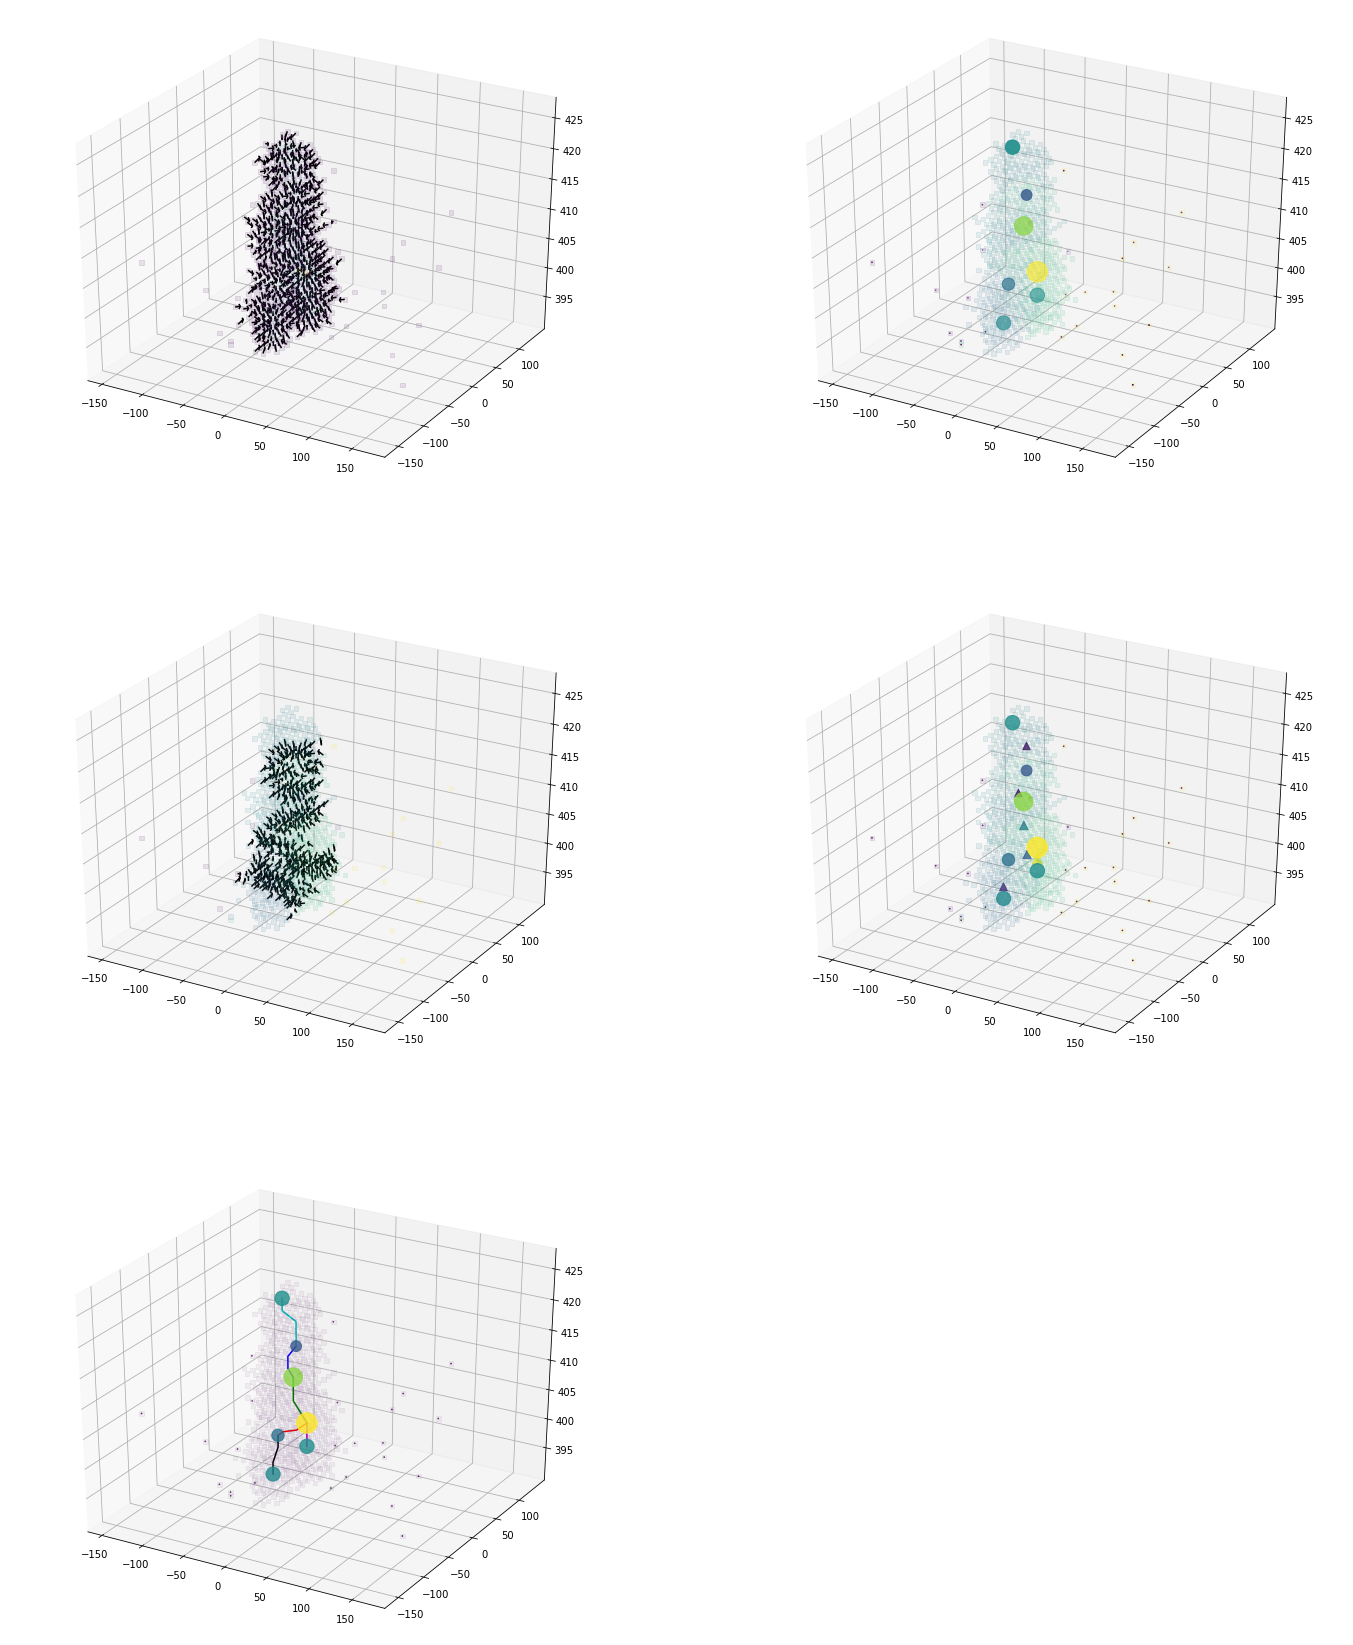

In [29]:
cells  = _cells(dfclouds, 3)
enes   = dfclouds.ene.values
enodes = dfclouds.enode.values
nodes  = dfclouds.node.values
epath  = dfclouds.epath.values
lpath  = dfclouds.lpath.values
epass  = dfclouds.epass.values

xaxis = 0

subplot = canvas(6, 2, 10, 12)

subplot(1, '3d')
dcloud_cells(cells, 1000. * enes, alpha = 0.1, xaxis = xaxis);
dcloud_grad(cells, epath, xaxis = xaxis)

subplot(2, '3d')
dcloud_cells(cells, nodes, alpha = 0.1, xaxis = xaxis);
dcloud_nodes(cells, 1000. * enodes, marker = 'o', xaxis = xaxis)

subplot(3, '3d')
dcloud_cells(cells, 1000. * nodes, alpha = 0.1, xaxis = xaxis);
dcloud_grad(cells, lpath, xaxis = xaxis)

subplot(4, '3d')
dcloud_cells(cells,     1000. * nodes , alpha = 0.1, xaxis = xaxis);
dcloud_nodes(cells,     1000. * enodes, marker = 'o', alpha = 0.8, xaxis = xaxis)
dcloud_nodes(cells, 5 * 1000. * epass , marker = '^', alpha = 0.8, xaxis = xaxis)

subplot(5, '3d')
dcloud_cells   (cells, alpha = 0.05, xaxis = xaxis);
dcloud_nodes   (cells, 1000. * enodes, alpha = 0.8, marker = 'o', xaxis = xaxis)
dcloud_segments(cells, epass, epath, lpath, xaxis = xaxis)



In [19]:
def canvas(ns : int, ny : int = 2, height : float = 5., width : float = 6.) -> callable:
    """ create a canvas with ns subplots and ny-columns,
    return a function to move to next subplot in the canvas
    """
    nx  = int(ns / ny + ns % ny)
    plt.figure(figsize = (width * ny, height * nx))
    def subplot(iplot, dim = '2d'):
        assert iplot <= nx * ny
        plt.subplot(nx, ny, iplot)
        if (dim == '3d'):
            nn = nx * 100 +ny *10 + iplot
            plt.gcf().add_subplot(nn, projection = dim)
        return nx, ny
    return subplot

ndim = len(coors)
sdim = '2d' if ndim == 2 else '3d'

def _cells(df, ndim):
    return [df['x'+str(i)].values for i in range(ndim)]

def _csel(vals, sel):
    return [val[sel] for val in vals]

def _karg(name, value, kargs):
    kargs[name] = value if name not in kargs.keys() else value
    return kargs
    


def dclouds_cells(cells, enes, **kargs):

    kargs = _carg('s', 100., kargs)
    plt.scatter(*cells, c = 1000. * enes, s = 100., alpha = 1., cmap = cmap)
    plt.colorbar();
    return


def dclouds_nodes(cells, nodes, enode, **kargs):
    
    

vcells = _csel(cells, dfclouds.epath.values)
draw_quiver(cells, vcells)

subplot(2, sdim)
# draw nodes regions and nodes centers
#subplot(2)
nodes  = dfclouds.node.values
draw_cloud(cells, c = nodes, alpha = alpha, cmap = cmap)
sel    = dfclouds.enode > 0
draw_cloud(_csel(cells, sel), s = 100., marker = '*', cmap = cmap)


subplot(3, sdim)
nodes  = dfclouds.node.values
draw_cloud(cells, c = nodes, alpha = alpha/2)

sel    = dfclouds.lnode.values != dfclouds.node.values
draw_cloud(_csel(cells, sel), c = nodes[sel], alpha = alpha/2)

enode  = dfclouds.enode
sel    = dfclouds.enode > 0
draw_cloud(_csel(cells, sel), s = 100., marker = '*', cmap = cmap)

sel = dfclouds.lgrad > 0.
cpos = _csel(cells, sel)
npos = _csel(cells, dfclouds.lpath.values[sel])
draw_quiver(cpos, npos)


subplot(4, sdim)
draw_cloud(cells, c = nodes, alpha = alpha/2)
sel    = dfclouds.lnode.values != dfclouds.node.values
draw_cloud(_csel(cells, sel), c = nodes[sel], alpha = alpha/2, cmap = cmap)
enode  = dfclouds.enode
sel    = dfclouds.enode > 0
draw_cloud(_csel(cells, sel), s = 100., marker = '*', cmap = cmap)
sel = dfclouds.epass > 0.
isel = dfclouds.lpath.values[sel]
npos = _csel(cells, isel)
cpos = _csel(cells, sel)
draw_quiver(cpos, npos)

IndentationError: expected an indented block (<ipython-input-19-8be13a050278>, line 43)

In [ ]:
subplot = canvas(4, 2, 8, 10)
alpha   = 0.4
cmap    = 'Reds'

# draw cells energy and gradient
subplot(1, sdim)
#enes  = dfclouds.ene.values
#cells = _cells(dfclouds, ndim)
#draw_cloud(cells, c = 1000. * enes, s = 100., alpha = alpha/(2*ndim), cmap = cmap)
#plt.colorbar();

enodes  = dfclouds.enode.values
sel     = enodes > 0.
draw_cloud(_csel(cells, sel), c = 1000. * enodes[sel], s = 1000. * enodes[sel], marker = 'o',
           alpha = alpha, cmap = cmap)

sel      = dfclouds.epass > 0
pass_kid = dfclouds.kid[sel]
segments = [get_segment(cells, get_pass_path(kid, dfclouds.epath, dfclouds.lpath)) for kid in pass_kid]
draw_segments(segments)

In [ ]:
def draw_clouds(x, y, z, ene, segments = [], scale = 20., rscale = 9., chamber = False, **kargs):
    """ Draw an event with hits x, y, z, ene
    inputs:
        x   : np.array, x-hit positions
        y   : np.array, y-hit positions
        z   : np.array, z-hit positions
        ene : np.array, energy or intensity of the hits
        scale  : float, scale factor of the markers
        rscale : float, scale factor of the size with energy/intensity
        chamber: bool (false), in NEW x,y,z frame
    """
    if (not 'alpha'  in kargs.keys()): kargs['alpha']  = 0.5
    if (not 'cmap'   in kargs.keys()): kargs['cmap']   = 'Greys'
    if (not 'marker' in kargs.keys()): kargs['marker'] = 's'

    rene = ut.arscale(ene)

    zsize, xysize = (0., 500.), (-200., 200)

    fig = plt.figure(figsize=(12, 9));
    #plt.subplots(2
    ax3D = fig.add_subplot(221, projection='3d')
    size   = scale       * (1. + rscale * rene)
    color  = np.max(ene) * rene
    #kargs['c'] = color if 'color' not in kargs.keys() else kargs['color']
    p3d = ax3D.scatter(x, y, z, s = size, c = color, **kargs)
    for segment in segments:
        plt.plot(*segment, color = 'black')
    ax3D.set_xlabel('z (mm)')
    ax3D.set_ylabel('x (mm)')
    ax3D.set_zlabel('y (mm)')
    if chamber:
        ax3D.set_xlim(zsize)
        ax3D.set_ylim(xysize)
        ax3D.set_zlim(xysize)

    plt.subplot(2, 2, 2)
    plt.scatter(x, z, s = size, c = color, **kargs)
    for segment in segments:
        plt.plot(segment[0], segment[2], color = 'black')
    ax = plt.gca()
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('z (mm)')
    if chamber:
        plt.xlim(xysize); plt.ylim(zsize)
    plt.colorbar();

    plt.subplot(2, 2, 3)
    plt.scatter(z, y, s = size, c = color, **kargs)
    for segment in segments:
        plt.plot(segment[2], segment[1], color = 'black')
    ax = plt.gca()
    ax.set_xlabel('z (mm)')
    ax.set_ylabel('y (mm)')
    if chamber:
        plt.xlim(zsize); plt.ylim(xysize)
    plt.colorbar();

    plt.subplot(2, 2, 4)
    plt.scatter(x, y, s = size, c = color, **kargs)
    for segment in segments:
        plt.plot(segment[0], segment[1], color = 'black')
    ax = plt.gca()
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    if chamber:
        plt.xlim(xysize); plt.ylim(xysize)
    plt.colorbar();
    plt.tight_layout()
    return

In [ ]:
def plt_clouds(coors, steps, weights):
    
    if (len(coors) == 3):
        return plt3d_clouds(coors, steps, weights)
    
    #--- data
    
    potential, bins     = clouds.potential(coors, steps, weights)
    cells, ene          = clouds.voxels(potential, bins)
    cells, deltas, dirs = clouds.gradient(potential, bins)
    cells, ncounts      = clouds.neighbours(potential, bins)
    nnode, npath, _     = clouds.paths(cells, bins, steps, dirs)
    enodes              = clouds.energy_nodes(ene, nnode)
    
    vgrad, vnode, vkid = clouds.staples(bins, cells, cells_ene, cells_kid , cells_kid) # equivalent to gradient!
    lgrad, lnode, lkid = clouds.staples(bins, cells, cells_ene, cells_node, cells_kid)
    cells_lnode = lnode
    cells_lgrad = lgrad
    cells_lkid = lkid

    staples, cells_staples = clouds.set_staples(cells_node, cells_lnode, cells_kid, cells_lkid, cells_lgrad)
    
    #----- plotting
    
    subplot = pltext.canvas(3, 1, 10, 12)
    cmap = 'Greys'

    scale = 2000.
    
    subplot(1)
    plt.hist2d(*cells, bins, weights = scale * cells_ene, alpha = 0.8, cmap = cmap);
    plt.colorbar();
    xdirs = to_coors(to_vectors(_csel(cells, cells_path)) - to_vectors(cells))
    plt.quiver(*cells, *xdirs, scale_units = 'xy', scale = 2.5)
    
    subplot(2)
    sel_nodes = cells_enode > 0
    plt.hist2d(*cells, bins, weights = cells_node, alpha = 0.2, cmap = cmap);
    plt.colorbar();
    plt.scatter(*_csel(cells, sel_nodes), marker = '*')
    xdirs = to_coors(to_vectors(_csel(cells, cells_lkid)) - to_vectors(cells))
    plt.quiver(*cells, *xdirs, scale_units = 'xy', scale = 2.)
    for staple in staples:
        segment = get_segment(cells, staple)
        plt.plot(*segment, color = 'blue')
    
    subplot(3)
    plt.hist2d(*cells, bins, weights = cells_node, alpha = 0.8, cmap = cmap);
    scale = 1000. * cells_enode[sel_nodes]
    plt.scatter(*_csel(cells, sel_nodes), marker = 's', s = scale, c = scale)
    plt.colorbar();
    for staple in staples:
        path = clouds.get_staple_path(staple, cells_path)
        segment = get_segment(cells, path)
        plt.plot(*segment, color = 'blue')
    
    #subplot(1)
    #plt.hist2d(*cells, bins, weights = ene)
    #plt.colorbar()
    
    #subplot(2)
    #ncounts_max = 9
    #sels = ((ncounts == 1), (ncounts == 9), (ncounts > 1) & (ncounts < 9))
    #names = ('isolated', 'inside', 'border')
    #markers = ('*', 's', '^')
    #for i, sel in enumerate(sels):
    #    plt.scatter(*[cells[i][sel] for i in range(2)], marker = markers[i], c = ene[sel], label = names[i])
    #plt.legend(); plt.colorbar();
    
    #subplot(3)
    #plt.quiver(*cells, *dirs, alpha = 1., scale_units = 'xy', scale = 2., color = 'blue');

    
def plt3d_clouds(coors, steps, weights):
    
    potential, bins           = clouds.potential(coors, steps, weights)
    cells, cells_ene          = clouds.voxels(potential, bins)
    ndim, nsize               = len(cells), len(cells[0])
    icells                    = clouds.to_indices(cells, bins)
    cells_hid                 = clouds.to_ids(icells)
    cells_kid                 = np.arange(nsize)
    _, ncounts                = clouds.neighbours(potential, bins)
    _, cells_grad, cells_dirs = clouds.gradient(potential, bins)
    cells_node, cells_path, _ = clouds.paths(cells, bins, steps, cells_dirs)
    cells_enode               = clouds.energy_nodes(cells_ene, cells_node) 
    
    vgrad, vnode, vkid = clouds.staples(bins, cells, cells_ene, cells_kid , cells_kid) # equivalent to gradient!
    lgrad, lnode, lkid = clouds.staples(bins, cells, cells_ene, cells_node, cells_kid)
    cells_lnode = lnode
    cells_lgrad = lgrad
    cells_lkid = lkid

    staples, cells_staples = clouds.set_staples(cells_node, cells_lnode, cells_kid, cells_lkid, cells_lgrad)
    
    subplot = pltext.canvas(2, 1, 8, 10)
    subplot(1)
    ax = plt.gcf().add_subplot(211, projection = '3d')
    #print(len(ene), len(dirs[0]))
    ax.quiver(*cells, *cells_dirs, alpha = 0.5, length = 0.4);

    segments = [clouds.get_segment(cells, clouds.get_staple_path(staple, cells_path)) for staple in staples]
    subplot(2)
    ax = plt.gcf().add_subplot(212, projection='3d')
    #ax = plt.gca(projection = '3d')
    #print(len(ene), len(dirs[0]))
    #kargs['c'] = color if 'color' not in kargs.keys() else kargs['color']
    ax.scatter(*cells, c = 10000. * cells_ene, s = 10000. * cells_ene, alpha = 0.1);
    #ax.plot(*_csel(cells, cells_enode >0), cells_enode[cells_enode > 0]
    for segment in segments:
        ax.plot(*segment, color = 'black')
    
    draw_clouds(*_csel(cells, cells_enode >0), cells_enode[cells_enode > 0], segments, cmap = 'Reds')
    
    #plt3d_gradient(cells, dirs)
    
    #plt3d_nodes(cells, enodes)
    
    return

    
def _csel(vals, sel):
    return [val[sel] for val in vals]



def plt3d_neighbours(cells, ncounts):

    ndim = 3
    ncounts_max = 3 ** ndim
    sels = ((ncounts == 1), (ncounts == 3 ** ndim), (ncounts > 1) & (ncounts < 3 **ndim))

    subplot = pltext.canvas(4, 2, 10, 12)
    
    names = ('isolated', 'inside', 'border')
    markers = ('*', 's', '.')
    for i, sel in enumerate(sels):
        subplot(i + 1)
        ax3D = plt.gcf().add_subplot(221 + i, projection='3d')
        nplay.track(*_csel(cells, sel), ncounts[sel], 
                     marker = markers[i], label = names[i], ax = ax3D, alpha = 0.4)
        
    subplot(4)
    ax3D = plt.gcf().add_subplot(224, projection = '3d')
    sel = (ncounts > 2) & (ncounts < 3 **ndim - 2)
    xx = _csel(cells, sel)
    ax3D.plot_trisurf(xx[2], xx[0], xx[1], alpha = 0.2)
    ax3D.set_xlabel('z (mm)'); ax3D.set_ylabel('x (mm)'); ax3D.set_zlabel('y (mm)')
    
    plt.legend()

    
def plt3d_gradient(cells, dirs):
    pltext.canvas(1, 1, 8, 10)
    ax = plt.gca(projection = '3d')

    #print(len(ene), len(dirs[0]))
    ax.quiver(*cells, *dirs, alpha = 0.5, length = 0.4);
    return


def plt3d_nodes(cells, enodes):

    sel = enodes > 0

    pltext.canvas(1, 1, 8, 10)

    nplay.event(*_csel(cells, sel), enodes[sel], cmap = 'jet', alpha = 0.5)


#plt.scatter(*_selval(sel, cells), c = ene[sel], mar

In [ ]:
xevents = [1241463, 981141, 2300475, 543247]
#xevents = [1002903, 928609, 1057115, 226373]
xevents = np.unique(ddh.event.values)
event   = np.random.choice(xevents, 1)[0]
#event   = 1645993, 1807203, 756596, 39402 # A nice track
draw_event(event)

In [ ]:
#event = 543247
hh    = dde.get_group(event)
x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
xstep, ystep, zstep = 10., 10., 2.

## 3D clouds

In [ ]:
coors        = (x, y, z)
weights      = erec
steps        = (xstep, ystep, zstep)

plt_clouds(coors, steps, weights)

## 2D Clouds

In [ ]:
#coors        = (x, y)
#weights      = erec
#steps        = (xstep, ystep)
#plt_clouds(coors, steps, weights)

In [ ]:
#coors        = (x, z)
#weights      = erec
#steps        = (xstep, zstep)

#plt_clouds(coors, steps, weights)

In [ ]:
#coors        = (y, z)
#weights      = erec
#steps        = (ystep, zstep)

#plt_clouds(coors, steps, weights)

In [ ]:
coors       = (y, z)
weights     = erec
steps       = (ystep, zstep)

In [ ]:
potential, bins           = clouds.potential(coors, steps, weights)
cells, cells_ene          = clouds.voxels(potential, bins)
ndim, nsize               = len(cells), len(cells[0])
icells                    = clouds.to_indices(cells, bins)
cells_hid                 = clouds.to_ids(icells)
cells_kid                 = np.arange(nsize)
_, ncounts                = clouds.neighbours(potential, bins)
_, cells_grad, cells_dirs = clouds.gradient(potential, bins)
cells_node, cells_path, _ = clouds.paths(cells, bins, steps, cells_dirs)
cells_enode               = clouds.energy_nodes(cells_ene, cells_node) 

In [ ]:
vgrad, vnode, vkid = clouds.staples(bins, cells, cells_ene, cells_kid , cells_kid) # equivalent to gradient!
lgrad, lnode, lkid = clouds.staples(bins, cells, cells_ene, cells_node, cells_kid)
cells_lnode = lnode
cells_lgrad = lgrad
cells_lkid = lkid

staples, cells_staples = clouds.set_staples(cells_node, cells_lnode, cells_kid, cells_lkid, cells_lgrad)

In [ ]:
def plt_clouds_(cells, cells_ene, cells_node, cells_enode, cells_path, cells_lkid):

    subplot = pltext.canvas(3, 1, 10, 12)
    cmap = 'Greys'

    subplot(1)
    plt.hist2d(*cells, bins, weights = 1000. * cells_ene, alpha = 0.8, cmap = cmap);
    plt.colorbar();
    xdirs = to_coors(to_vectors(_csel(cells, cells_path)) - to_vectors(cells))
    plt.quiver(*cells, *xdirs, scale_units = 'xy', scale = 2.5)
    
    subplot(2)
    sel_nodes = cells_enode > 0
    plt.hist2d(*cells, bins, weights = cells_node, alpha = 0.2, cmap = cmap);
    plt.colorbar();
    plt.scatter(*_csel(cells, sel_nodes), marker = '*')
    xdirs = to_coors(to_vectors(_csel(cells, cells_lkid)) - to_vectors(cells))
    plt.quiver(*cells, *xdirs, scale_units = 'xy', scale = 2.)
    for staple in staples:
        segment = get_segment(cells, staple)
        plt.plot(*segment, color = 'blue')
    
    subplot(3)
    plt.hist2d(*cells, bins, weights = cells_node, alpha = 0.8, cmap = cmap);
    scale = 1000. * cells_enode[sel_nodes]
    plt.scatter(*_csel(cells, sel_nodes), marker = 's', s = scale, c = scale)
    plt.colorbar();
    for staple in staples:
        path = clouds.get_staple_path(staple, cells_path)
        segment = get_segment(cells, path)
        plt.plot(*segment, color = 'blue')
        
plt_clouds_(cells, cells_ene, cells_node, cells_enode, cells_path, cells_lkid)

In [ ]:

get_moves = clouds.get_moves

def clouds_staples(xbins, xcells, xcells_enes, xcells_nodes, xcells_kids):
    """ returns the cells that are links between a second set of cells, cell_test
    inputs:
        bins : tupe(array), m-dim tuple with the bins in each coordinate
        cells: tuple(array), m-dim tuple with n-size arrays with the cells coordinates
        enes : array,        n-size array with the energy of the cells
        cells_node : 
        cells_kid  :
    returns:
        cells_link_grad : array, n-size with the gradient to the link with respect to this cell
        cells_link_kid  : array, n-size with the id of the gradient cell to this cell 
        cells_link_node : array, n-size with the id of the linked node to this cell
    """

    ndim, nsize  = len(xcells), len(xcells[0])

    steps        = [ibin[1] - ibin[0] for ibin in xbins]

    nodes, _     = np.histogramdd(xcells, xbins, weights = xcells_nodes)
    potential, _ = np.histogramdd(xcells, xbins, weights = xcells_enes)
    kids, _      = np.histogramdd(xcells, xbins, weights = xcells_kids)
    
    shape        = potential.shape
    sel_cells    = potential > 0

    nn_potential = np.copy(potential)
    nn_nodes     = np.copy(nodes).astype(int)
    nn_kids      = np.copy(kids) .astype(int)

    #moves = get_moves_updown(ndim)
    moves = get_moves(ndim)

    for move in moves:

        coors_next         = [xcells[i] + steps[i] * move[i] for i in range(ndim)]
        potential_next, _  = np.histogramdd(coors_next, xbins, weights = xcells_enes)
        nodes_next, _      = np.histogramdd(coors_next, xbins, weights = xcells_nodes)
        kids_next, _       = np.histogramdd(coors_next, xbins, weights = xcells_kids)

        sel_nodes          = nodes_next != nodes 
        sel_pot_next       = potential + potential_next > nn_potential
        
        sel = (sel_cells) & (sel_nodes) & (sel_pot_next)
        nn_potential[sel] = potential[sel] + potential_next[sel]
        nn_nodes    [sel] = nodes_next    [sel]
        nn_kids     [sel] = kids_next     [sel]
    
    link_grad  = nn_potential[sel_cells] #- potential[sel_cells]
    link_nodes = nn_nodes    [sel_cells]
    link_kids  = nn_kids     [sel_cells]
    
    return link_grad, link_nodes, link_kids 


In [ ]:
to_vectors = clouds.to_vectors
to_coors   = clouds.to_coors

vgrad, vnode, vkid = clouds_staples(bins, cells, cells_ene, cells_kid, cells_kid)

lgrad, lnode, lkid = clouds_staples(bins, cells, cells_ene, cells_node, cells_kid)


cells_lnode = lnode
cells_lgrad = lgrad
cells_lkids = lkid

In [ ]:
subplot = pltext.canvas(2, 1, 12, 14)
cmap = 'Greys'

subplot(1)
plt.hist2d(*cells, bins, weights = cells_ene, alpha = 0.8, cmap = cmap);
xdirs = to_coors(to_vectors(_csel(cells, vkid)) - to_vectors(cells))
plt.quiver(*cells, *xdirs, scale_units = 'xy', scale = 2.)

subplot(2)
plt.hist2d(*cells, bins, weights = cells_node, alpha = 0.8, cmap = cmap);
#plt.scatter(*_csel(cells, cells_enode >0), marker = '*')
xdirs = to_coors(to_vectors(_csel(cells, lkid)) - to_vectors(cells))
plt.quiver(*cells, *xdirs, scale_units = 'xy', scale = 2.)


In [ ]:
nodes_ene, nodes_kid, nodes_ncells  = clouds.nodes_order(cells_enode, cells_node, cells_kid)
print('node cells  : ', nodes_kid)
print('node cells  : ', nodes_ncells)

In [ ]:
cells_staples = np.full(nsize, False)
for i, inode in enumerate(nodes_kid):
    for jnode in nodes_kid[ i +1 :]:
        sel  = (cells_node == inode) & (cells_lnode == jnode)
        if (np.sum(sel) >0) :
            isel = np.argmax(cells_lgrad[sel])
            id1  = cells_kid [sel][isel]
            id2  = cells_lkids[sel][isel]
            cells_staples[id1] = True
            #cells_staples[id2] = inode
    
staples = zip(cells_kid[cells_staples], cells_lkids[cells_staples])
staples = sorted(staples)
print(staples)

In [ ]:
def get_path(kid, next_kid):
    path = []
    while next_kid[kid] != kid:
        path.append(kid)
        kid = next_kid[kid]
    path.append(kid)
    return path

def get_segment(cells, kids):
    ndim = len(cells)
    segment = [[cells[i][kid] for kid in kids] for i in range(ndim)]
    return segment

In [ ]:
paths = [get_path(kid, cells_path) for kid in cells_kid]
#print(paths)

In [ ]:
subplot = pltext.canvas(3, 2, 10, 12)
cmap = 'Greys'

subplot(1)
plt.hist2d(*cells, bins, weights = cells_ene, alpha = 0.8, cmap = cmap);
xdirs = to_coors(to_vectors(_csel(cells, vkid)) - to_vectors(cells))
plt.quiver(*cells, *xdirs, scale_units = 'xy', scale = 2.5)

for kid in cells_kid:
    path = get_path(kid, cells_path)
    segment = get_segment(cells, path)
    plt.plot(*segment, color = 'black')
    
subplot(2)
plt.hist2d(*cells, bins, weights = cells_ene, alpha = 0.8, cmap = cmap);
plt.scatter(*_csel(cells, cells_enode >0), marker = '*')
xdirs = to_coors(to_vectors(_csel(cells, lkid)) - to_vectors(cells))
plt.quiver(*cells, *xdirs, scale_units = 'xy', scale = 2.)
for staple in staples:
    segment = get_segment(cells, staple)
    plt.plot(*segment, color = 'blue')
    
subplot(3)
plt.hist2d(*cells, bins, weights = cells_ene, alpha = 0.8, cmap = cmap);
plt.scatter(*_csel(cells, cells_enode >0), marker = '*')
for staple in staples:
    path1, path2    = get_path(staple[0], cells_path), get_path(staple[1], cells_path)
    path1.reverse()
    print(path1, path2)
    path = path1 + path2
    segment = get_segment(cells, path)
    plt.plot(*segment, color = 'blue')


In [ ]:
subplot = pltext.canvas(1, 1, 12, 14)
cmap = 'Greys'


def get_segment(cells, kids):
    ndim = len(cells)
    segment = [[cells[i][kid] for kid in kids] for i in range(ndim)]
    return segment
    
subplot(1)
plt.hist2d(*cells, bins, weights = cells_node, alpha = 0.8, cmap = cmap);
plt.scatter(*_csel(cells, cells_enode >0), marker = '*')

for staple in staples:
    segment = get_segment(cells, staple)
    plt.plot(*segment, color = 'black')
    
    
for k1, k2 in staples:
    segment = get_segment(cells, get_path(k1, cells_vkid))
    plt.plot(*segment, color = 'black')



#plt.scatter(*_csel(cells, staples_kids), marker = 's');

In [ ]:
cells_lnode = lnode
cells_lgrad = lgrad
cells_lkids = lkid
#print('nodes'        , set(cells_node))
#print('linked nodes ', set(cells_lnode))

sel = cells_lnode != cells_node


staples = set(zip(cells_node[sel], cells_lnode[sel]))
staples = sorted(staples)
print(staples)

In [ ]:
cells_lnode = lnode
cells_lgrad = lgrad
cells_lkids = lkid
#print('nodes'        , set(cells_node))
#print('linked nodes ', set(cells_lnode))

sel = cells_lnode != cells_node

staples = set(zip(cells_node[sel], cells_lnode[sel]))

#print(*staples)

staples_kids = []
for staple in staples:
    sel_staple  = (cells_node == staple[0]) & (cells_lnode == staple[1])
    isel        = np.max(cells_lgrad[sel_staple])
    
    ### TODO: assocaite to the CELL with the highest coll
    kids  = cells_kids [sel_staple]
    lkids = cells_lkids[sel_staple]
    ikd2  = lkids[np.max(cells_enes[lkids])]
    sel_ikd1s  = sel & cells_lkids == ikd2
    ikd1  = kdis [np.argmax(cells_)]
                                   
                            
    kid_link_maxene = isel
    staple_ene = cells_ene[sel] + cells_ene[cells_lkids[sel]]
    #print(staple, 'size ', np.sum(sel), 'min grad ', np.min(cells_lgrad[sel])) 
    isel = np.argmax(staple_ene)
    staples_kids.append(cells_kid[sel][isel])

#print(staples_kids)

In [ ]:
#print(*zip(cells_node, lknodes))

to_vectors = clouds.to_vectors
to_coors   = clouds.to_coors

links, refs = clouds_staples(bins, cells, cells_ene, cells_kid, cells_kid)

vref, vgrad = refs[2].astype(int), links[2].astype(int)
#, vgrad = 1000.*refs[0], 1000.*links[0]

lkgrad = links[0] - refs[0]
lkkids = links[2].astype(int)

#print(lkgrad)

ii = 10
#_kid[ii], vgrad[ii], vnodes[ii], vkids[ii])
print('i ', ii, ', grad ', lkgrad[ii], ', kid ', lkkids[ii])
#print(*_csel(cells, [ii]), ' : ', *_csel(cells, lkkids[ii]))
xdirs = to_coors(to_vectors(_csel(cells, lkkids)) - to_vectors(cells))
print(xdirs)


pltext.canvas(1, 1, 10, 12)
plt.scatter(*cells, marker = '.')
plt.quiver(*cells, *xdirs, scale_units = 'xy', scale = 2.)
#_csel(cells, lkkids[ii]))
#print(clouds.to_vectors(_csel(cells, vnodes)) - clouds.to_vectors(cells))

In [ ]:
nodes_ene, nodes_kid, nodes_ncells  = clouds.nodes_order(cells_enode, cells_node, cells_kid)
print('node cells  : ', nodes_kid)
print('node cells  : ', nodes_ncells)

In [ ]:
lkgrad, lknodes, lkkids = clouds_staples(bins, cells, cells_ene, cells_node, cells_kid)

In [ ]:
pltext.canvas(1, 1, 12, 14)
alpha = 0.5
cmap  = 'Reds'

plt.hist2d(*cells, bins, weights = 1 + cells_node, cmap = cmap, alpha = 0.5);
plt.scatter(*_csel(cells, cells_enode > 0), marker = 's');
plt.quiver(*cells, *cells_dirs,  scale_units = 'xy', scale = 2.)
#dirs = [ncell - cell for cell, ncell in zip(_csel(cells, cells_kid), _csel(cells, lkkids[cells_kid]))]
#print(clouds.to_vectors(dirs))
#plt.quiver(*cells, *dirs)


In [ ]:
pltext.canvas(1, 1, 10, 12)
alpha = 0.5
cmap  = 'jet'

plt.scatter(*cells, c = cells_node, marker = 's', alpha = alpha, cmap = cmap, s = 80);
sel = cells_enode > 0
plt.scatter(*_csel(cells, sel), marker = '*')

sel = lkgrad > 0.
plt.scatter(*_csel(cells, sel), marker = '.', alpha = alpha, cmap = cmap);
#sel

#plt.scatter(*_csel(cells, sel), marker = '^', alpha = 0.5)


### Study of 3D

In [ ]:
nodes_ene, nodes_kid, nodes_ncells  = clouds.nodes_order(cells_enode, cells_node, cells_kid)

#print('node energy : ', nodes_ene)
#print('node ID     : ', nodes_kid)
print('node cells  : ', nodes_ncells)

In [ ]:
links_nodes, links_kids = clouds.nodes_links(nodes_kid, bins, cells, cells_ene, 
                                             cells_node, cells_kid, cells_hid)
print('linked nodes : ', links_nodes)
print('linked cells : ', links_kids)

In [ ]:
def todraw_nodes(nodes_kid, cells):
    
    ndim = len(cells)
    #xcells = (cells[-1], *cells[:-1]) if ndim == 3 else xcells
    xnodes = [cell[nodes_kid] for cell in cells]
    return xnodes


def todraw_segments(links_kids, cells):

    ndim = len(cells)
    #xcells = (cells[-1], *cells[:-1]) if ndim == 3 else cells
    
    segments = []
    for link in links_kids:
        points = []
        for i, kid in enumerate(link):
            #print(i, kid)
            while cells_path_kid[kid] != kid:
                #print(kid, cells_path_kid[kid])
                points.append([cell[kid] for cell in cells])
                kid = cells_path_kid[kid]
                #print(kid)
            points.append([cell[kid] for cell in cells])
            if i == 0: points.reverse()
        segment = [[point[i] for point in points] for i in range(ndim)]
        segments.append(segment)
        
    return segments

def plt3d_segments(cells, nodes, enodes, segments, ijk = (2, 1, 0)):
    
    i, j, k = ijk
    
    ndim = len(cells)
    subplot = pltext.canvas(4, 2, 10, 12)
    
    subplot(1)
    ax = plt.gcf().add_subplot(221, projection = '3d') if ndim == 3 else plt.gca()
    #xcells = cells if ndim != 3 else (cells[-1], *cells[:-1])
    ax.scatter(cells[i], cells[j], cells[k], alpha = 0.05)
    scale = cells_enode[nodes_kid]
    ax.scatter(nodes[i], nodes[j], nodes[k], marker = 's', c =  scale, s = 1000 * scale)
    #plt.colorbar();
    for segment in segments:
        ax.plot(segment[i], segment[j], segment[k], c = 'black')
        
    subplot(2)
    plt.scatter(cells[i], cells[k], alpha = 0.05)
    plt.scatter(nodes[i], nodes[k], marker = 's', c = scale, s = 1000 * scale)
    plt.colorbar();
    for segment in segments:
        plt.plot(segment[i], segment[k], c = 'black')
        
    subplot(3)
    plt.scatter(cells[i], cells[j], alpha = 0.05)
    plt.scatter(nodes[i], nodes[j], marker = 's', c = scale, s = 1000 * scale)
    plt.colorbar();
    for segment in segments:
        plt.plot(segment[i], segment[j], c = 'black')


    subplot(4)
    plt.scatter(cells[j], cells[k], alpha = 0.05)
    plt.scatter(nodes[j], nodes[k], marker = 's', c = scale, s = 1000 * scale)
    plt.colorbar();
    for segment in segments:
        plt.plot(segment[j], segment[k], c = 'black')
        
    
    return
        

segments = todraw_segments(links_kids, cells)
#print(segments)

xnodes  = todraw_nodes(nodes_kid, cells)
#print(xnodes)

plt3d_segments(cells, xnodes, cells_enode[nodes_kid], segments)

In [ ]:
to_coors   = clouds.to_coors
get_moves  = clouds.get_moves 

def clouds_links(bins, cells, enes, cells_test, enes_test):
    
    ndim, nsize  = len(cells), len(cells[0])
        
    steps        = [ibin[1] - ibin[0] for ibin in bins]
    centers      = [ut.centers(ibin) for ibin in bins]

    potential, _ = np.histogramdd(cells, bins, weights = enes)
    shape        = potential.shape
    
    sel          = potential > 0
    shape        = potential.shape
    #cells        = to_coors(np.argwhere(sel))
    #xcells       = [centers[i][cells[i]] for i in range(ndim)]
    #weights      = potential[cells]

    nn_potential   = np.copy(potential)
    nn_dirs        = np.full((*shape, ndim), 0)

    #moves = get_moves_updown(ndim)
    moves = get_moves(ndim)

    for move in moves:
        coors_next         = [cells_test[i] + steps[i] * move[i] for i in range(ndim)]
        potential_next, _  = np.histogramdd(coors_next, bins, weights = enes_test)


        isel                     = potential + potential_next > nn_potential
        nn_potential[sel & isel] = potential[sel & isel] + potential_next[sel & isel]

        if (np.sum(sel & isel) > 0):
            nn_dirs[sel & isel] = -1 * np.array(steps) * move


    deltas  = nn_potential[sel] - potential[sel]
    dirs    = to_coors(nn_dirs[sel])

    return cells, deltas, dirs

    


In [ ]:
coors       = (x, z)
weights     = erec
steps       = (xstep, zstep)

In [ ]:
potential, bins          = clouds.potential(coors, steps, weights)
cells, cells_ene         = clouds.voxels(potential, bins)
ndim, nsize              = len(cells), len(cells[0])
icells                   = clouds.to_indices(cells, bins)
cells_hid                = clouds.to_ids(icells)
cells_kid                = np.arange(nsize)
cells, deltas, dirs      = clouds.gradient(potential, bins)
cells, ncounts           = clouds.neighbours(potential, bins)
cells_node, npath, paths = clouds.paths(cells, bins, steps, dirs)
cells_enode              = clouds.energy_nodes(cells_ene, cells_node)    

In [ ]:
sel = cells_enode > 0.
#voxel_id  = np.arange(nsize)
nodes_kid  = cells_kid[sel]
nodes_ene  = cells_enode[sel]

nodes = sorted(zip(nodes_ene, nodes_kid))
nodes.reverse()
nnodes        = len(nodes)
nodes_ene     = [node[0] for node in nodes]
nodes_kid     = [node[1] for node in nodes]
nodes_nvoxels = [np.sum(cells_node == node_id) for node_id in nodes_kid] 

In [ ]:
print(nodes_kid)
print(nodes_nvoxels)
print(nodes_ene)

TODO

* loop nexted in the nodes
* compute the link with the largest delta, store it like (node_next, voxel_link, voxel_link (dir?)
* for each connection a tool to return the voxels or segments in the path!!
* draw it in 3D!

In [ ]:
def _node(inode):
    sel    = cells_node == inode
    cells1 = _csel(cells, sel)
    enes1  = cells_ene[sel]
    return cells1, enes1
    

nnodes         = len(nodes_kid)
staples_nodes  = []
staples_kids   = []
staples_lenghs = []
for inode, node1_kid in enumerate(nodes_kid):
    sel1    = cells_node == node1_kid
    cells1  = [cell[sel1] for cell in cells]
    #enes1   = cells_ene[sel1]
    for node2_kid in (nodes_kid[ inode + 1 : ]):
        #print(node1_kid, node2_kid)
        sel2 = node_kid == node2_kid
        _, xdeltas, xdirs = clouds_links(bins, *_node(node1_kid), *_node(node2_kid))
        #print('nodes ', node1_kid, node2_kid, ' deltas ', xdeltas[xdeltas > 0])
        if (np.sum(xdeltas > 0.) <= 0): continue
        #print('size node1 ', node1_kid, np.sum(sel1))
        
        #cells1 = [cell[sel1] for cell in cells]
        
        #print(xdeltas)
        staple_nodes = (node1_kid, node2_kid)
        #staple_ene  = 
        sel   = nnode == node1_kid
        i1    = np.argmax(xdeltas)
        #print('max i1, delta, cell, dir', i1, xdeltas[i1], 
        #      [cell[i1] for cell in cells1], [xdir[i1] for xdir in xdirs])
        kid1  = cells_kid[sel1][i1]
        #print('max cell ', [cell[kid1] for cell in cells])
       
        loc = [(cell[i1] + xdir[i1],) for cell, xdir in zip(cells1, xdirs)]
        #print('loc ', loc)
        
        hid2 = clouds.to_ids(clouds.to_indices(loc, bins))
        #print('hid2 ', hid2)
        
        isel = np.isin(cells_hid, hid2)
        kid2 = cells_kid[isel][0]
        #print('kid2', kid2, ', hi2', cells_hid[isel], ', cell ', [cell[isel] for cell in cells])
        
        #idirs = clouds.to_indices(xdirs[i1], bins)
        staple_kids  = (kid1, kid2)
        
        staples_nodes.append(staple_nodes)
        staples_kids .append(staple_kids)
        #print(staple_nodes)
        #print(staple_kids)
        
        #    cells1, _ = _node(node1_kid)
        #    icell = np.argmax(xdeltas)
        #    staple_node = (node1_kid, node_2_kid)
        #    staple_kid  = (cells1kid[icell], 
 
print(staples_nodes)
print(staples_kids)


In [ ]:
pltext.canvas(1, 1, 8, 10)
plt.scatter(*cells, marker = 's', c = cells_node, cmap = 'jet', alpha = 0.8);
plt.scatter(*_csel(cells, cells_enode > 0), marker = '*', s = 200.)

s1cells = [[] for i in range(ndim)]
s2cells = [[] for i in range(ndim)]
sdirs   = [[] for i in range(ndim)]
for i in range(ndim):
    s1cells[i] = [float(cells[i][cells_kid == ki1]) for ki1, ki2 in staples_kids]
    s2cells[i] = [float(cells[i][cells_kid == ki2]) for ki1, ki2 in staples_kids]
    sdirs[i]   = list(np.array(s2cells[i]) - np.array(s1cells[i]))

print(s1cells)
print(s2cells)
print(sdirs)

#plt.scatter(*s1cells, marker = '>')
#plt.scatter(*s2cells, marker = '<')

for i in range(ndim):
    s1cells[i] = [float(cells[i][cells_kid == ki1]) for ki1, ki2 in staples_kids]
    s2cells[i] = [float(cells[i][cells_kid == ki2]) for ki1, ki2 in staples_kids]
    sdirs[i]   = list(np.array(s2cells[i]) - np.array(s1cells[i]))

for kid1, kid2 in staples_kids:
    scells = [(cell[kid1], cell[kid2]) for cell in cells] 
    plt.plot(*scells, lw = 3.)
    
sline = [[] for i in range(ndim)]
for staple in staples_kids:
    for kid in staple:
        sline = [[] for i in range(ndim)]
        for i in range(ndim):
            sline[i] += [cells[i][ipath] for ipath in paths[kid]] 
        plt.plot(*sline, ls = '-', color = 'black')


    #scells = [(paths[kid1], cell[kid2]) for cell in cells] 
plt.plot(*sline, ls = '--')

#plt.quiver(*s1cells, *sdirs, scale_units = 'xy', scale = 1.)



In [ ]:
enode1, enode2 = nodes_id[:2]
print(enode1, enode2)

def cells_node(inode):
    sel = nnode == inode
    cells1 = _csel(cells, sel)
    enes1  = ene[sel]
    return cells1, enes1

cells_node(enode1)
cells_node(enode2)

_, xdeltas, xdirs = clouds_links(bins, *cells_node(enode1), *cells_node(enode2))
#xcells, xdeltas, xdirs = clouds_links()

isel = np.argmax(xdeltas)
print(xdeltas[isel], xdirs[0][isel], xdirs[1][isel])

#print(type(xdeltas), len(xdirs[0]), len(xdirs[1]))

In [ ]:
pltext.canvas(1, 1, 6, 8)
sel = nnode == enode1
cells1 = _csel(cells, sel)
plt.scatter(*_csel(cells, sel), c = ene[sel], marker = 's', alpha = 0.5);
sel = nnode == enode2
plt.scatter(*_csel(cells, sel), c = ene[sel], marker = 'o', alpha = 0.5);
plt.colorbar();
plt.scatter(*_csel(cells1, isel), marker = '*');
plt.quiver(*_csel(cells1, isel), xdirs[0][isel], xdirs[1][isel])